Filter size = 5


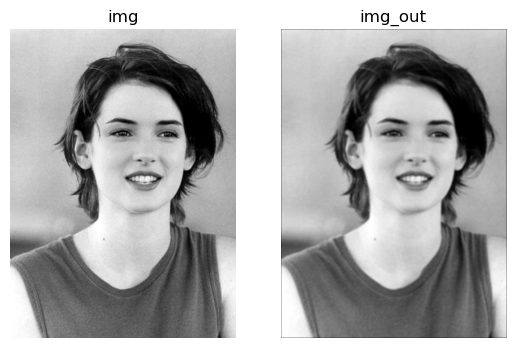

Filter size = 11


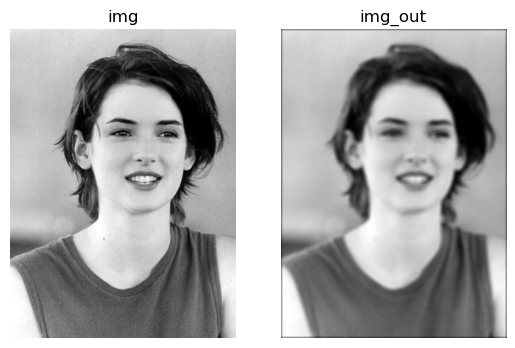

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Conv2D
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Steps 2~9 (25 points)
# Enter your code here.
def img_filter(filter_size=5):
    # Step 2: call tf functional API to create a model with the following layers:
    inputs = tf.keras.Input((None, None, 1))    # dynamic input shape for (h, w) but with channel=1
    # Step 3: Conv2D with kernel_size=5, stride=1, padding=2
    # shape after convolution: (x-5+2*2)/1+1 = x
    kernel_size = filter_size
    stride = 1
    padding = 'same'    # means the output shape and input shape are the same
    outputs = Conv2D(1, kernel_size=kernel_size, strides=stride, padding=padding, name='conv1')(inputs)
    # Step 4: Create a model
    filter_net = tf.keras.Model(inputs=inputs, outputs=outputs)
    # Step 5: set model weights and biases
    weights = np.full((kernel_size, kernel_size, 1, 1), 1/kernel_size**2) # fill the np.array with the same value
    bias = np.array([0])
    filter_net.get_layer('conv1').set_weights([weights, bias])
    # Step 6: read image
    img = cv2.imread('Winona.jpg', cv2.IMREAD_GRAYSCALE)
    # Step 7: add batch dimension , #(h, w) = (772, 564)
    img_batch =np.expand_dims(img, axis=0) # (1, 772, 564)
    # Step 8: get image output
    img_out = filter_net(img_batch) # shape = (1, 772, 564, 1)
    # Reshape to (772, 564) and convert to uint8
    img_out = np.reshape(img_out, (772, 564)).astype(np.uint8)
    # Step 9: show the original and output image
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('img')
    ax[0].axis('off')
    ax[1].imshow(img_out, cmap='gray')
    ax[1].set_title('img_out')
    ax[1].axis('off')
    plt.show()

# Call the function and compared the output with filter_size 11 and filter_size 5
print("Filter size = 5")
img_filter(filter_size=5)
print("Filter size = 11")
img_filter(filter_size=11)

#[Question 1 (5 points)] If kernel_size in Steps 3 and 5 is changed from 5 to 11,
# how will img_out change (more blurry or more clear)? Why?

# [Answer]
# The output image will be more blurry.
# Because the kernel size becomes larger, 
# the more area of the image is averaged (including padding 0 values).
# Hence, the information of the image is more blurred.

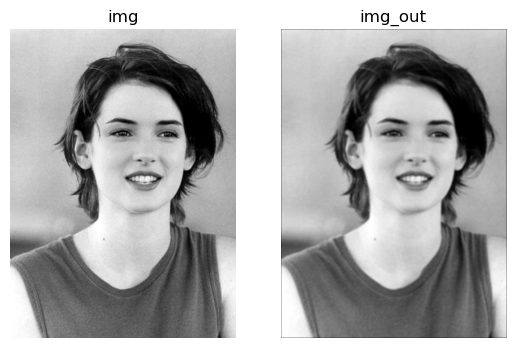

In [2]:
# Steps 10~13 (15 points)
# Enter your code here.
# Step 10: padded the image handfully
kernel_size = 5
pad = int((kernel_size-1)/2)
img_pad = np.zeros((772+pad*2, 564+pad*2)) # (772+2*pad, 564+2*pad)
# put original image in the center of the padded image
img = cv2.imread('Winona.jpg', cv2.IMREAD_GRAYSCALE)
img_pad[pad:pad+772, pad:pad+564] = img  # image slicing [y:y+h, x:x+w]
# Step 11: redo step 2 to step 5
inputs = tf.keras.Input((None, None, 1))    # dynamic input shape for (h, w) but with channel=1
stride = 1
padding = 'valid'    # modify here to 'valid'
outputs = Conv2D(1, kernel_size=kernel_size, strides=stride, padding=padding, name='conv1')(inputs)
filter_net = tf.keras.Model(inputs=inputs, outputs=outputs)
weights = np.full((kernel_size, kernel_size, 1, 1), 1/kernel_size**2) # fill the np.array with the same value
bias = np.array([0])
filter_net.get_layer('conv1').set_weights([weights, bias])
# Step 12: add batch dimension
img_batch =np.expand_dims(img_pad, axis=0) # (1, 772+2*pad, 564+2*pad)
# Step 13: repeat step 8 and step 9
# Step 8: get image output
img_out = filter_net(img_batch) # shape = (1, 772, 564, 1)
# Reshape to (772, 564) and convert to uint8
img_out = np.reshape(img_out, (772, 564)).astype(np.uint8)
# Step 9: show the original and output image
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('img')
ax[0].axis('off')
ax[1].imshow(img_out, cmap='gray')
ax[1].set_title('img_out')
ax[1].axis('off')
plt.show()

# [Question 2 (5 points)] Let Step 2 to Step 9 be denoted as Method 1, and Step 10 to Step 13 be denoted as Method 2. 
# Why Methods 1 and 2 lead to the same results?

# [Answer]
# Method 1 uses 'same' padding, which calculating the padding automatically.
# Therefore Method 1's output image and input image have the same shape.
# Method 2 uses 'valid', which means "no padding" on image.
# However, the image is padded manually before convolution.
# In conclusion, both methods have the same effect on the image and get the same result.